In [ ]:
from google.colab import drive # Mount the google drive for data loading
drive.mount('/content/drive')

Mounted at /content/drive


# Import some related dependencies
1.   Numpy: a package for array transformation
2.   Pandas: a package for loading data with .csv/.xlsx formats
3.   Matplotlib: a package for data visualization
4.   Skearn: a package including many machine learning approaches
5.   Tensorflow: a package for neural networks modeling
5.   Keras: a package for neural networks modeling which is established on Tensorflow

In [ ]:
import numpy as np #helps for array operation
import pandas as pd #helps to read the data
import matplotlib.pyplot as plt #helps with graphical plots
from sklearn.preprocessing import StandardScaler #helps for standardation of input data
from sklearn.model_selection import train_test_split #helps to split training data and testing data
import keras #helps for CNN model construction
import tensorflow as tf #helps for CNN model construction

# Load data using pandas package
Data loading and data visualiazation


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/lab_code/IowaExtendedHousingPrices.csv')  # Load data with the corresponding path in google drive 

In [ ]:
print (df.columns) # Columns names

Index(['YearBuilt', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'YrSold', 'SalePrice'],
      dtype='object')


In [ ]:
print (df.shape)   # Size of dataset

(1460, 9)


In [ ]:
print (df.head())  # Display of the first few samples

   YearBuilt  2ndFlrSF  GrLivArea  ...  TotRmsAbvGrd  YrSold  SalePrice
0       2003       854       1710  ...             8    2008     208500
1       1976         0       1262  ...             6    2007     181500
2       2001       866       1786  ...             6    2008     223500
3       1915       756       1717  ...             7    2006     140000
4       2000      1053       2198  ...             9    2008     250000

[5 rows x 9 columns]


In [ ]:
print (df.info())  # Infomation of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   YearBuilt     1460 non-null   int64
 1   2ndFlrSF      1460 non-null   int64
 2   GrLivArea     1460 non-null   int64
 3   FullBath      1460 non-null   int64
 4   HalfBath      1460 non-null   int64
 5   BedroomAbvGr  1460 non-null   int64
 6   TotRmsAbvGrd  1460 non-null   int64
 7   YrSold        1460 non-null   int64
 8   SalePrice     1460 non-null   int64
dtypes: int64(9)
memory usage: 102.8 KB
None


In [ ]:
print (df.describe()) # Display some statistical results

         YearBuilt     2ndFlrSF  ...       YrSold      SalePrice
count  1460.000000  1460.000000  ...  1460.000000    1460.000000
mean   1971.267808   346.992466  ...  2007.815753  180921.195890
std      30.202904   436.528436  ...     1.328095   79442.502883
min    1872.000000     0.000000  ...  2006.000000   34900.000000
25%    1954.000000     0.000000  ...  2007.000000  129975.000000
50%    1973.000000     0.000000  ...  2008.000000  163000.000000
75%    2000.000000   728.000000  ...  2009.000000  214000.000000
max    2010.000000  2065.000000  ...  2010.000000  755000.000000

[8 rows x 9 columns]


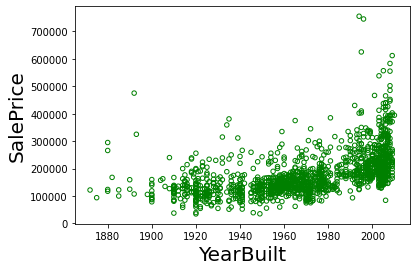

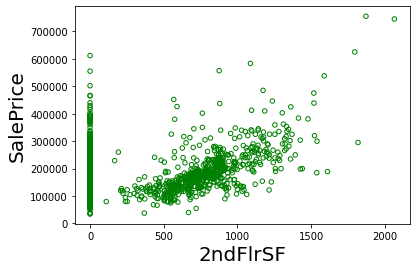

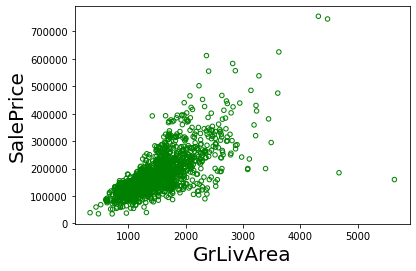

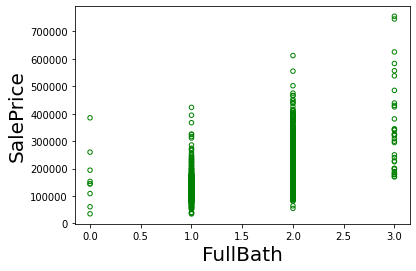

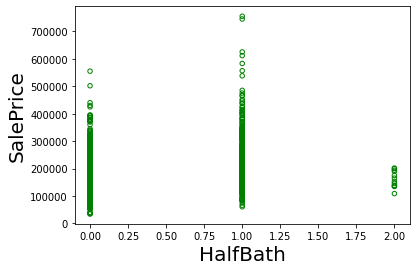

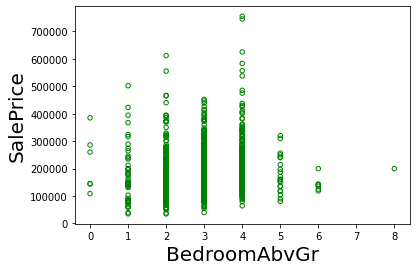

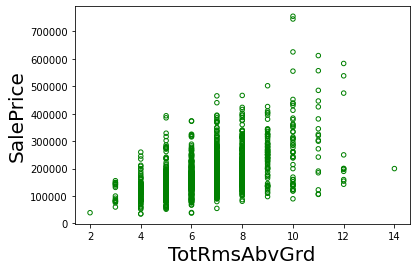

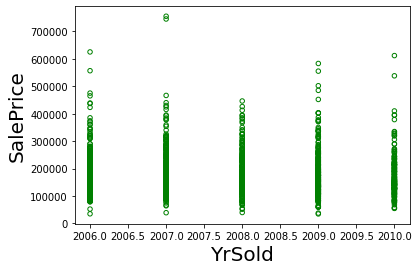

In [ ]:
# Visualization
for column in df.columns[:-1]:
  plt.scatter(df[column], df['SalePrice'], s=20, marker='o', edgecolor=['green'], c='none')  # Scatter saleprice verus each feature
  plt.xlabel(column, fontsize=20)
  plt.ylabel('SalePrice', fontsize=20)
  plt.show()

X = df.iloc[:,:-1].values                # Transform input data to an array
Y = df['SalePrice'].values.reshape(-1,1) # Transform labels to a shape of (1460, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # Randomly split training data and test data with a ratio of 7:3
X_train = np.expand_dims(X_train, axis=2) # Add a dimension for each training sample - 1 x 8 x 1
X_train = np.expand_dims(X_train, axis=2) # Add a dimension for each training sample to form an image - 1 x 8 x 1 x 1

X_test = np.expand_dims(X_test, axis=2)   # Add a dimension for each testing sample - 1 x 8 x 1
X_test = np.expand_dims(X_test, axis=2)   # Add a dimension for each testing sample to form an image - 1 x 8 x 1 x 1

In [ ]:
print (X_train.shape)
print (X_test.shape)

(1022, 8, 1, 1)
(438, 8, 1, 1)


# Model training

In [ ]:
# LeNet-5 structure for model training
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=6, kernel_size=(5,1), strides=(1,1), padding='same', activation='relu', input_shape=(8, 1, 1)))  # The first convolutional layer. Input shape is 8x1x1 and activation function is Rectified Linear Unit (ReLU).\
                                                           # Kernel size and stride are set as (5,1) and (1,1), respectively. The number of convolutional kernels is 6. Besides, the zero padding is 'same', thus the output shape is (8/1) x 1 x 6 = 8x1x6, which is the same as the input shape.
model.add(keras.layers.MaxPool2D(pool_size=(2,1), strides=(2,1)))  # The first maxpooling layer. The pool size and stride are both (2,1), thus the output shape is 4x1x6, where 4 = (8-2)/2 + 1.
model.add(keras.layers.Conv2D(filters=16, kernel_size=(5,1), strides=(1,1), padding='same', activation='relu')) # The second convolutional layer. The output shape is 4x1x16, where 4 = 4/1.
model.add(keras.layers.MaxPool2D(pool_size=(2,1), strides=(2,1)))  # The second maxpooling layer. The pool size and stride are both (2,1). The output shape is 2x1x16, where 2 = (4-2)/2+1.
model.add(keras.layers.Flatten())                          # The previous output is flattened to be a vector.
model.add(keras.layers.Dense(120, activation='relu'))      # The first fully connected layer.
model.add(keras.layers.Dense(84, activation='relu'))       # The second fully connected layer.
model.add(keras.layers.Dense(1))                           # we have 1 neuron for output (SalePrice).
model.summary()                                            # Summary the constructed model.
model.compile(tf.keras.optimizers.SGD(learning_rate = 1e-11), 'mean_squared_error') # Model construction with a SGD optimizer and a mean squared error loss function.
model.fit(X_train, y_train, epochs = 100, batch_size = 64, verbose = 2)             # Model training with some hyperparameters.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 1, 6)           36        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 1, 6)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 1, 16)          496       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 1, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 120)               3

# Model testing

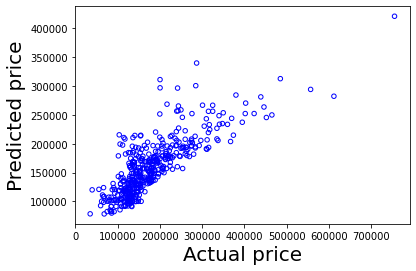

In [ ]:
prediction = model.predict(X_test)    # Prediction of the testing set

# Visualization
plt.scatter(y_test, prediction, s=20, marker='o', edgecolor=['blue'], c='none')
plt.xlabel('Actual price', fontsize=20)
plt.ylabel('Predicted price', fontsize=20)
plt.show()

# Data normalization
We find the learning rate is very small, which is confusing. To solve this issue, a data normalization is performed.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) # Randomly split training data and testing data with a ratio of 7:3

In [ ]:
scaler = StandardScaler()   # Standardization function  
scaler.fit(X_train)         # Standardization fitting using training data 
X_train = scaler.transform(X_train) # Standardization transformation of training data 
X_test = scaler.transform(X_test)   # Standardization transformation of testing data 

X_train = np.expand_dims(X_train, axis=2) # Add a dimension for each training sample - 1 x 8 x 1
X_train = np.expand_dims(X_train, axis=2) # Add a dimension for each training sample to form an image - 1 x 8 x 1 x 1
X_test = np.expand_dims(X_test, axis=2)   # Add a dimension for each testing sample - 1 x 8 x 1
X_test = np.expand_dims(X_test, axis=2)   # Add a dimension for each testing sample to form an image - 1 x 8 x 1 x 1

y_train_max = max(y_train)      # The maximum value of training labels
y_train = y_train/y_train_max   # Normalization of training labels
y_test = y_test/y_train_max     # Normalization of testing labels

In [ ]:
# LeNet-5 structure for model training
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=6, kernel_size=(5,1), strides=(1,1), padding='same', activation='relu', input_shape=(8, 1, 1)))  # The first convolutional layer. Input shape is 8x1x1 and activation function is Rectified Linear Unit (ReLU).\
                                                           # Kernel size and stride are set as (5,1) and (1,1), respectively. The number of convolutional kernels is 6. Besides, the zero padding is 'same', thus the output shape is (8/1) x 1 x 6 = 8x1x6, which is the same as the input shape.
model.add(keras.layers.MaxPool2D(pool_size=(2,1), strides=(2,1)))  # The first maxpooling layer. The pool size and stride are both (2,1), thus the output shape is 4x1x6, where 4 = (8-2)/2 + 1.
model.add(keras.layers.Conv2D(filters=16, kernel_size=(5,1), strides=(1,1), padding='same', activation='relu')) # The second convolutional layer. The output shape is 4x1x16, where 4 = 4/1.
model.add(keras.layers.MaxPool2D(pool_size=(2,1), strides=(2,1)))  # The second maxpooling layer. The pool size and stride are both (2,1). The output shape is 2x1x16, where 2 = (4-2)/2+1.
model.add(keras.layers.Flatten())                          # Flatten the previous output to be a vector.
model.add(keras.layers.Dense(120, activation='relu'))      # The first fully connected layer.
model.add(keras.layers.Dense(84, activation='relu'))       # The second fully connected layer.
model.add(keras.layers.Dense(1))                           # we have 1 neuron for output (SalePrice).
model.summary()                                            # Summary the constructed model.
model.compile(tf.keras.optimizers.SGD(learning_rate = 3e-2), 'mean_squared_error') # Model construction with a SGD optimizer and a mean squared error loss function.
model.fit(X_train, y_train, epochs = 100, batch_size = 64, verbose = 2)             # Model training with some hyperparameters.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 8, 1, 6)           36        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 1, 6)          0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 1, 16)          496       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 1, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 120)              

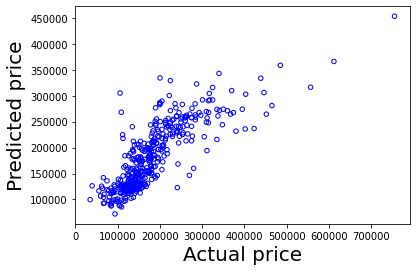

In [ ]:
prediction = model.predict(X_test)    # Prediction of the testing set

# Visualization
plt.scatter(y_test*y_train_max, prediction*y_train_max, s=20, marker='o', edgecolor=['blue'], c='none')
plt.xlabel('Actual price', fontsize=20)
plt.ylabel('Predicted price', fontsize=20)
plt.show()